In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

Text(0, 0.5, 'MtCO2/year')

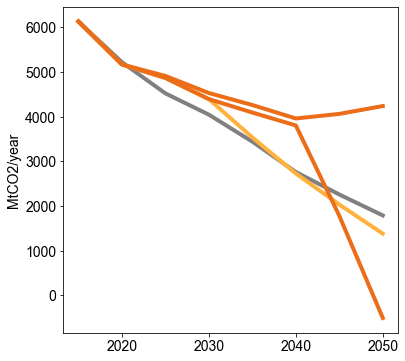

In [16]:
#trajectory
df=pd.read_excel("CO2_accounting_0826.xlsx",sheet_name='totalGHG')

df = df[df['Year'].isin([2015, 2020,2025,2030,2035,2040,2045,2050])]
time=df['Year']
ES=df['stick']
E2030=df['2030nl']
E2040=df['2040nl']

E2050 = df['2050nl']





Text(0, 0.5, 'GtCO2')

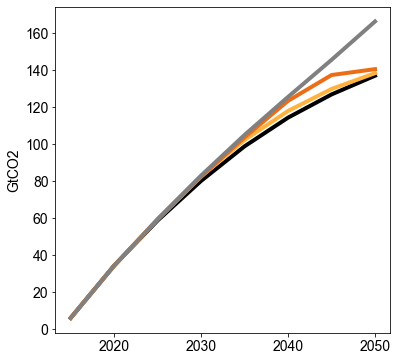

In [18]:
#cumulative

#calculating
ES_c=[]
Total=0
for i in range(len(df['Year'])):

    year = df['Year'].iloc[i]
    emission =df ['stick'].iloc[i]
    if year == 2015:
        ES_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+df['stick'].iloc[i-1])
        Total = Total + total
        ES_c.append(Total)

E2030_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =df ['2030nl'].iloc[i]
    if year == 2015:
        E2030_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+df['2030nl'].iloc[i-1])
        Total = Total + total
        E2030_c.append(Total)

E2040_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =df ['2040nl'].iloc[i]
    if year == 2015:
        E2040_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+df ['2040nl'].iloc[i-1])
        Total = Total + total
        E2040_c.append(Total)
E2050_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =E2050[i]
    if year == 2015:
        E2050_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2050[i-1])
        Total = Total + total
        E2050_c.append(Total)


ES_c= [x / 1000 for x in ES_c]
E2030_c=[x / 1000 for x in E2030_c]
E2040_c=[x / 1000 for x in E2040_c]
E2050_c=[x / 1000 for x in E2050_c]

#plotting
plt.figure(figsize=(6, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14


plt.plot(time,ES_c, color='black', linewidth=4)
plt.plot(time,E2030_c, color= '#FFB23D', linewidth=4)
plt.plot(time,E2040_c, color = '#EC6D18', linewidth=4)
plt.plot(time,E2050_c, color='gray', linewidth=4)
plt.ylabel("GtCO2")



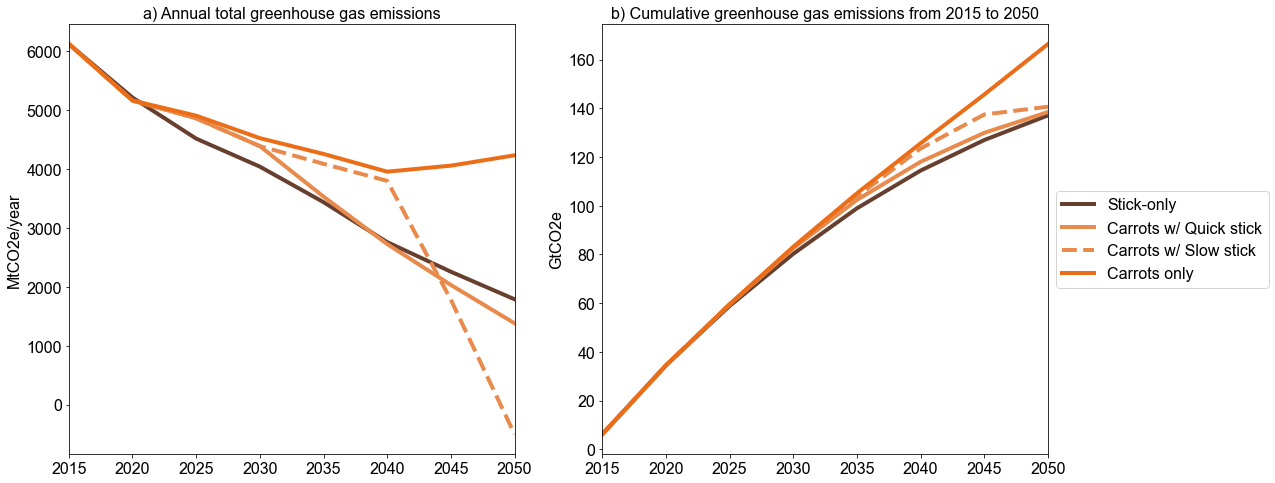

In [19]:
#plotting code
fig = plt.figure(figsize=(18, 7))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 16


gs = fig.add_gridspec(1,3)
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
# ax3 = fig.add_subplot(gs[2])

ax1.plot(time,ES, color='#673F2F', linewidth=4)
ax1.plot(time,E2030, color= '#E88A4C', linewidth=4,linestyle = "-")
ax1.plot(time,E2040 , color = '#E88A4C', linewidth=4,linestyle = "--")
ax1.plot(time,E2050 , color = '#EC6D18', linewidth=4,linestyle = "-")

ax1.set_ylabel("MtCO2e/year")
ax1.set_xlim(2015, 2050)

# ax2.plot(time,ES_c, color='gray', linewidth=4)
ax2.plot(time,ES_c, color='#673F2F', linewidth=4, label = "Stick-only")
ax2.plot(time,E2030_c, color= '#E88A4C', linewidth=4, linestyle = "-", label = "Carrots w/ Quick stick")
ax2.plot(time,E2040_c, color = '#E88A4C', linewidth=4, linestyle = "--", label = "Carrots w/ Slow stick")
ax2.plot(time,E2050_c, color = '#EC6D18', linewidth=4, linestyle = "-", label = "Carrots only")

ax2.set_ylabel("GtCO2e")
ax2.set_xlim(2015, 2050)


ax1.set_title("a) Annual total greenhouse gas emissions",  fontsize = 16)
ax2.set_title("b) Cumulative greenhouse gas emissions from 2015 to 2050", fontsize = 16)
# ax3.set_title("c) CO2 prices in 2050", fontsize = 16)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# plt.show()